In [1]:
import openai
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from openai.embeddings_utils import cosine_similarity
from openai.embeddings_utils import get_embedding

In [14]:
df = pd.read_csv("EPiC Database 2019.csv", names = ['category','material','functional unit','embodied_energy','embodied_water','embodied_greenhouse_gas_emissions','more_information'], skiprows=1)
df.head(10) 

,category,material,functional unit,embodied_energy,embodied_water,embodied_greenhouse_gas_emissions,more_information
0,Concrete and plaster products,Concrete block,kg,2.6,3.7,0.24,http://doi.org/10.26188/5da552ea39cdc
1,Concrete and plaster products,Concrete block - 390 × 190 × 90 mm,no.,24.3,34.2,2.2,http://doi.org/10.26188/5da552ea39cdc
2,Concrete and plaster products,Concrete block - 390 × 190 × 140 mm,no.,29.6,41.6,2.7,http://doi.org/10.26188/5da552ea39cdc
3,Concrete and plaster products,Concrete block - 390 × 190 × 190 mm,no.,35.2,49.4,3.2,http://doi.org/10.26188/5da552ea39cdc
4,Concrete and plaster products,Cement mortar,kg,3.9,3.7,0.35,http://doi.org/10.26188/5da5528f75432
5,Concrete and plaster products,Portland cement,kg,11.8,7.8,1.3,http://doi.org/10.26188/5da55701cee5d
6,Concrete and plaster products,Autoclaved aerated concrete (AAC),kg,8.5,8.4,0.71,http://doi.org/10.26188/5da551fc254d7
7,Concrete and plaster products,AAC block - 600 × 200 × 100 mm,no.,56.4,55.4,4.7,http://doi.org/10.26188/5da551fc254d7
8,Concrete and plaster products,AAC block - 600 × 200 × 150 mm,no.,84.5,83,7,http://doi.org/10.26188/5da551fc254d7
9,Concrete and plaster products,AAC block - 600 × 200 × 200 mm,no.,113,111,9.4,http://doi.org/10.26188/5da551fc254d7


In [15]:
df["combined"] = (
    "material: " + df.material.str.strip() + "; category: " + df.category.str.strip())
df.head()

,category,material,functional unit,embodied_energy,embodied_water,embodied_greenhouse_gas_emissions,more_information,combined
0,Concrete and plaster products,Concrete block,kg,2.6,3.7,0.24,http://doi.org/10.26188/5da552ea39cdc,material: Concrete block; category: Concrete a...
1,Concrete and plaster products,Concrete block - 390 × 190 × 90 mm,no.,24.3,34.2,2.2,http://doi.org/10.26188/5da552ea39cdc,material: Concrete block - 390 × 190 × 90 mm; ...
2,Concrete and plaster products,Concrete block - 390 × 190 × 140 mm,no.,29.6,41.6,2.7,http://doi.org/10.26188/5da552ea39cdc,material: Concrete block - 390 × 190 × 140 mm;...
3,Concrete and plaster products,Concrete block - 390 × 190 × 190 mm,no.,35.2,49.4,3.2,http://doi.org/10.26188/5da552ea39cdc,material: Concrete block - 390 × 190 × 190 mm;...
4,Concrete and plaster products,Cement mortar,kg,3.9,3.7,0.35,http://doi.org/10.26188/5da5528f75432,material: Cement mortar; category: Concrete an...


In [17]:
# df['embeddings'] = df.combined.apply(lambda x: get_embedding(x, engine="text-embedding-ada-002"))
# df.to_csv('epic_data_embeddings.csv')

In [18]:
df_test = pd.read_csv('epic_data_embeddings.csv')
df_test['embeddings'] = df_test['embeddings'].apply(eval).apply(np.array)
df_test.head()

,Unnamed: 0,category,material,functional unit,embodied_energy,embodied_water,embodied_greenhouse_gas_emissions,more_information,combined,embeddings
0,0,Concrete and plaster products,Concrete block,kg,2.6,3.7,0.24,http://doi.org/10.26188/5da552ea39cdc,material: Concrete block; category: Concrete a...,"[-0.024642838165163994, 0.015626830980181694, ..."
1,1,Concrete and plaster products,Concrete block - 390 × 190 × 90 mm,no.,24.3,34.2,2.2,http://doi.org/10.26188/5da552ea39cdc,material: Concrete block - 390 × 190 × 90 mm; ...,"[-0.01360582560300827, 0.019889047369360924, -..."
2,2,Concrete and plaster products,Concrete block - 390 × 190 × 140 mm,no.,29.6,41.6,2.7,http://doi.org/10.26188/5da552ea39cdc,material: Concrete block - 390 × 190 × 140 mm;...,"[-0.013860644772648811, 0.023600922897458076, ..."
3,3,Concrete and plaster products,Concrete block - 390 × 190 × 190 mm,no.,35.2,49.4,3.2,http://doi.org/10.26188/5da552ea39cdc,material: Concrete block - 390 × 190 × 190 mm;...,"[-0.013017719611525536, 0.02138431742787361, -..."
4,4,Concrete and plaster products,Cement mortar,kg,3.9,3.7,0.35,http://doi.org/10.26188/5da5528f75432,material: Cement mortar; category: Concrete an...,"[-0.019160808995366096, 0.01942121982574463, -..."


In [19]:
search_term_epic = input('Enter a search term: ')

In [20]:
search_term_vector_epic = get_embedding(search_term_epic, engine='text-embedding-ada-002')
df_test['similarities'] = df_test['embeddings'].apply(lambda x: cosine_similarity(x, search_term_vector_epic))
sort_df = df_test.sort_values("similarities", ascending=False)
sort_df[['material','category','similarities']].head(10)

,material,category,similarities
0,Concrete block,Concrete and plaster products,0.817683
2,Concrete block - 390 × 190 × 140 mm,Concrete and plaster products,0.811887
3,Concrete block - 390 × 190 × 190 mm,Concrete and plaster products,0.811861
1,Concrete block - 390 × 190 × 90 mm,Concrete and plaster products,0.810947
19,Concrete 40 MPa,Concrete and plaster products,0.808150
40,Concrete roof tile,Concrete and plaster products,0.807253
12,Concrete 20 MPa - 30% GGBFS,Concrete and plaster products,0.806720
10,Concrete 20 MPa,Concrete and plaster products,0.805865
37,Gypsum plaster,Concrete and plaster products,0.805851
16,Concrete 32 MPa,Concrete and plaster products,0.805038


In [18]:
epic_df = pd.read_csv("Material Names from project.csv")
epic_df["Name"] = epic_df["Name"].str.strip()
epic_df.head()

,Name,Category,Category.1,Locked,Deletable,Id,Family and Type,Family,Type,Family Name,...,Young modulus Z,Young modulus Y,Young modulus X,Shininess,Smoothness,Glow,Transparency,Color,Phase Demolished,Phase Created
0,Default,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,False,True,23,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,NaN,...,199.95,199.95,199.95,64.0,50.0,False,0.0,"215,231,232",Revit Element : <None>,Revit Element : <None>
1,Default Wall,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,False,True,24,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,NaN,...,199.95,199.95,199.95,64.0,50.0,False,0.0,"250,245,165",Revit Element : <None>,Revit Element : <None>
2,Default Roof,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,False,True,25,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,NaN,...,199.95,199.95,199.95,64.0,50.0,False,0.0,"240,240,240",Revit Element : <None>,Revit Element : <None>
3,COX - G - Glass,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,False,True,26,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,NaN,...,199.95,199.95,199.95,12.0,50.0,False,95.0,"190,241,252",Revit Element : <None>,Revit Element : <None>
4,Phase-Demo,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,False,True,27,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,NaN,...,199.95,199.95,199.95,64.0,50.0,False,40.0,"255,0,0",Revit Element : <None>,Revit Element : <None>


In [19]:
epic_df['embeddings'] = epic_df["Name"].apply(lambda x: get_embedding(x, engine="text-embedding-ada-002"))

In [67]:
epic_df.head()

,Name,Category,Category.1,Locked,Deletable,Id,Family and Type,Family,Type,Family Name,...,Young modulus Y,Young modulus X,Shininess,Smoothness,Glow,Transparency,Color,Phase Demolished,Phase Created,embeddings
0,Default,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,False,True,23,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,NaN,...,199.95,199.95,64.0,50.0,False,0.0,"215,231,232",Revit Element : <None>,Revit Element : <None>,"[0.0009697352652437985, 0.0012438098201528192,..."
1,Default Wall,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,False,True,24,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,NaN,...,199.95,199.95,64.0,50.0,False,0.0,"250,245,165",Revit Element : <None>,Revit Element : <None>,"[-0.005326817277818918, 0.012643874622881413, ..."
2,Default Roof,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,False,True,25,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,NaN,...,199.95,199.95,64.0,50.0,False,0.0,"240,240,240",Revit Element : <None>,Revit Element : <None>,"[-0.014151150360703468, 0.00246897479519248, -..."
3,COX - G - Glass,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,False,True,26,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,NaN,...,199.95,199.95,12.0,50.0,False,95.0,"190,241,252",Revit Element : <None>,Revit Element : <None>,"[-0.0141944270581007, -0.008225918747484684, 0..."
4,Phase-Demo,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,False,True,27,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,NaN,...,199.95,199.95,64.0,50.0,False,40.0,"255,0,0",Revit Element : <None>,Revit Element : <None>,"[-0.0021141667384654284, -0.018393076956272125..."


In [28]:
def find_most_similar_matches(embedding_vector):
    similarities = df_test['embeddings'].apply(lambda x: cosine_similarity(x, embedding_vector))
    most_similar_indices = similarities.nlargest(5).index
    most_similar_rows = df_test.loc[most_similar_indices]
    return most_similar_rows["material"].tolist(), similarities[most_similar_indices].tolist()

In [31]:
# Find the most similar match for each material name in the new dataset
epic_df[['Most_Similar_Material', 'Similarity_Score']] = epic_df['embeddings'].apply(find_most_similar_matches).apply(pd.Series)
epic_df[['1st_Most_Similar_Material', '2nd_Most_Similar_Material', '3rd_Most_Similar_Material', '4th_Most_Similar_Material', '5th_Most_Similar_Material']] = pd.DataFrame(epic_df['Most_Similar_Material'].tolist(), index=epic_df.index)
epic_df[['1st_Similarity_Score', '2nd_Similarity_Score', '3rd_Similarity_Score', '4th_Similarity_Score', '5th_Similarity_Score']] = pd.DataFrame(epic_df['Similarity_Score'].tolist(), index=epic_df.index)
epic_df.to_csv('(Cox x EPiC)material matched.csv')

In [45]:
cox_df = pd.read_csv("(Cox x EPiC)material matched.csv")
new_cox_df = cox_df[['Name','Category','Category.1', 'Keynote', 'Locked','Deletable','Id','Family and Type','Family','Type', 'Most_Similar_Material']]
# new_cox_df.to_csv('(Cox x EPiC)sorted_match.csv')
new_cox_df.head(20)

,Name,Category,Category.1,Keynote,Locked,Deletable,Id,Family and Type,Family,Type,Most_Similar_Material
0,Default,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,PNT-101,False,True,23,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,"['Wallpaper', 'Water', 'Flat glass', 'Woven ca..."
1,Default Wall,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,NaN,False,True,24,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,"['Wallpaper', 'Wallpaper - per m²', 'FC weathe..."
2,Default Roof,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,NaN,False,True,25,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,"['Polycarbonate roofing sheet - 3 mm', 'Polyca..."
3,COX - G - Glass,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,GLS-100,False,True,26,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,"['Toughened glass', 'Toughened glass sheet - 6..."
4,Phase-Demo,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,NaN,False,True,27,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,"['Aluminium composite panel', 'Concrete 50 MPa..."
5,Phase-Exist,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,NaN,False,True,28,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,"['Ethylene tetrafluoroethylene (ETFE)', 'Dimen..."
6,Phase-Temp,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,NaN,False,True,29,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,"['Ethylene tetrafluoroethylene (ETFE)', 'ETFE ..."
7,COX - BK - Brick,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,BK,False,True,414,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,"['Clay brick', 'Clay roof tile', 'Concrete blo..."
8,COX - CB - Concrete Block,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,CB,False,True,415,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,"['Concrete block - 390 × 190 × 90 mm', 'Concre..."
9,Metal - Stud Layer,Revit Category : Materials : id -2000700,Revit Category : Materials : id -2000700,NaN,False,True,416,Revit Element : <None>,Revit Element : <None>,Revit Element : <None>,"['Stainless steel sheet', 'Copper sheet - 1.2 ..."


In [51]:
#Find the value with the highest similarity
highest_similarity = sort_df['similarities'].max()

In [2]:
if highest_similarity >= 0.9:
    fact_with_highest_similarity = sort_df.loc[sort_df['similarities'] == highest_similarity, 'Material']
    print(fact_with_highest_similarity)
else:
    response = openai.Completion.create(
      model = 'davinci:ft-personal-2023-08-01-13-10-00',
      prompt = search_term_epic,
      max_tokens = 30,
      temperature = 0
    )
    content = response['choices'][0]['text'].replace('\n', '')
    print(content)


NameError: name 'highest_similarity' is not defined

In [12]:
def search_materials(epic_df, material_description, n=5, pprint=True):
    material_embedding = get_embedding(
        material_description,
        engine="text-embedding-ada-002"
    )
    epic_df["similarities"] = epic_df.embeddings.apply(lambda x: cosine_similarity(x, material_embedding))

    results = (
        epic_df.sort_values("similarities", ascending=False)
        .head(n)
        .loc[:, "material"] #<--- how to get two columns and return everything
    )
    if pprint:
        for r in results:
            print(r)
            print()
    return results

In [13]:
results = search_materials(epic_df, "Concrete", n=5)

Concrete block

Concrete block - 390 × 190 × 190 mm

Concrete block - 390 × 190 × 140 mm

Concrete block - 390 × 190 × 90 mm

Concrete 40 MPa



In [11]:
import tkinter as tk
import openai

def on_submit():
   # Get the prompt from the input field
   prompt = search_term_epic


   # Make the completion request
   completion = search_materials(epic_df, prompt, n=5, pprint=True)


   # Clear the input field
   input_field.delete(0, "end")


   # Get the completion text from the first choice in the choices list
   text = completion["text"]


   # Display the completion in the result text area
   result_text.config(state="normal")
   result_text.delete("1.0", "end")
   result_text.insert("end", text)
   result_text.config(state="disabled")


# Create the main window
window = tk.Tk()
window.title("Put in a material")


# Create the input field and submit button
input_field = tk.Entry(window)
submit_button = tk.Button(window, text="Submit", command=on_submit)


# Create the result text area
result_text = tk.Text(window, state="normal", width=80, height=20)


# Add the input field, submit button, and result text area to the window
input_field.pack()
submit_button.pack()
result_text.pack()


# Run the main loop
window.mainloop()


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE

# Load the embeddings
df_epic_em = pd.read_csv('epic_data_embeddings.csv')

# Convert to a list of lists of floats
matrix = np.array(df_epic_em.embeddings.apply(eval).to_list())

# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)

# Define the categories and their respective colors
categories = df_epic_em['Category'].unique()
colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]

# Extract the x and y coordinates from the t-SNE result
x = [coord[0] for coord in vis_dims]
y = [coord[1] for coord in vis_dims]

# Get the color indices for each point
color_indices = df_epic_em.Category.astype('category').cat.codes

# Create a colormap based on the categories and colors
colormap = mcolors.ListedColormap(colors)

# Scatter plot with category colors
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)

# Plot markers for each category
for score, color in enumerate(colors):
    avg_x = df_epic_em[df_epic_em.Category == categories[score]]['embeddings'].apply(eval).apply(lambda x: x[0]).mean()
    avg_y = df_epic_em[df_epic_em.Category == categories[score]]['embeddings'].apply(eval).apply(lambda x: x[1]).mean()
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100, label=categories[score])

# Add legend
plt.legend(title='Categories', loc='upper right')

plt.title("Material Categories visualized using t-SNE")
plt.show()

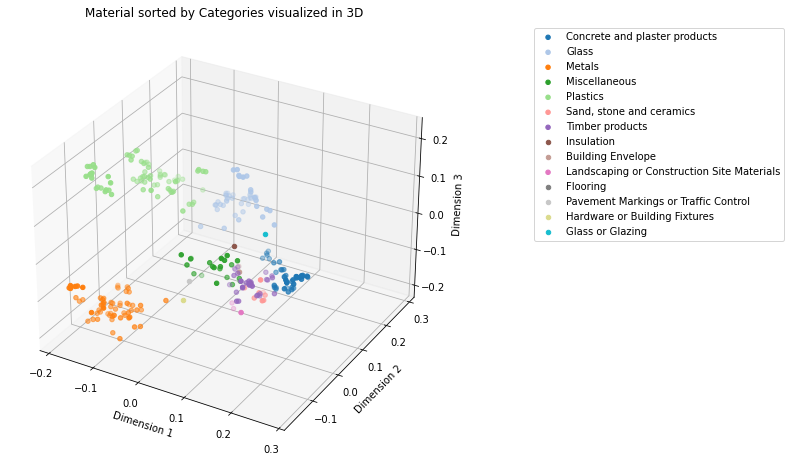

In [6]:
import pandas as pd
from openai.embeddings_utils import get_embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load your material dataset
csv_path = "epic_data_embeddings.csv"
material_data = pd.read_csv(csv_path)

# Query embeddings for your material data
text_data = material_data["combined"].tolist()
matrix = get_embeddings(text_data, engine="text-embedding-ada-002")

# Reduce the embedding dimensionality
pca = PCA(n_components=3)
vis_dims = pca.fit_transform(matrix)
material_data["embed_vis"] = vis_dims.tolist()

# Increase the figure size for a larger graph
fig = plt.figure(figsize=(12, 8))  # Adjust the figsize as needed
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap("tab20")
unique_categories = material_data["category"].unique()

# Plot each category individually
for i, category in enumerate(unique_categories):
    sub_matrix = np.array(material_data[material_data["category"] == category]["embed_vis"].to_list())
    x = sub_matrix[:, 0]
    y = sub_matrix[:, 1]
    z = sub_matrix[:, 2]
    colors = [cmap(i / len(unique_categories))] * len(sub_matrix)
    ax.scatter(x, y, z, c=colors, label=category)

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

# Move the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.2, 1))

plt.title("Material sorted by Categories visualized in 3D")
plt.show()
